<a href="https://colab.research.google.com/github/BrunoPasculli/Employee-s-turnover-cost/blob/main/Notebooks/Renuncia_de_empleados_(employee%E2%80%99s_turnover_cost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### CARGA DE LIBRERIAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### CARGA DE DATOS

In [ ]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

In [ ]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


## BUSINESS ANALYTICS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

#### ANÁLISIS DE NULOS

In [ ]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Conclusiones:

* anos_en_puesto y conciliacion tienen demasiados nulos --> eliminar variables
* sexo, educacion, satisfaccion_trabajo e implicacion --> imputarlos tras EDA

La variable anos_en_puesto podría ser clave en el análisis de la diserción de los empleados, sin embargo, tiene 1238 registos NA sobre 1470, por lo que considero oportuno eliminar dicha variable.

In [ ]:
# elimino las variables mencionadas con inplace para que haga la modificación en el dataframe original
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


#### EDA VARIABLES CATEGÓRICAS

In [ ]:
def graficos_eda_categoricos(cat):

    #Calculo el número de filas que necesito
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Defino el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplano para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creo el bucle que va añadiendo los gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

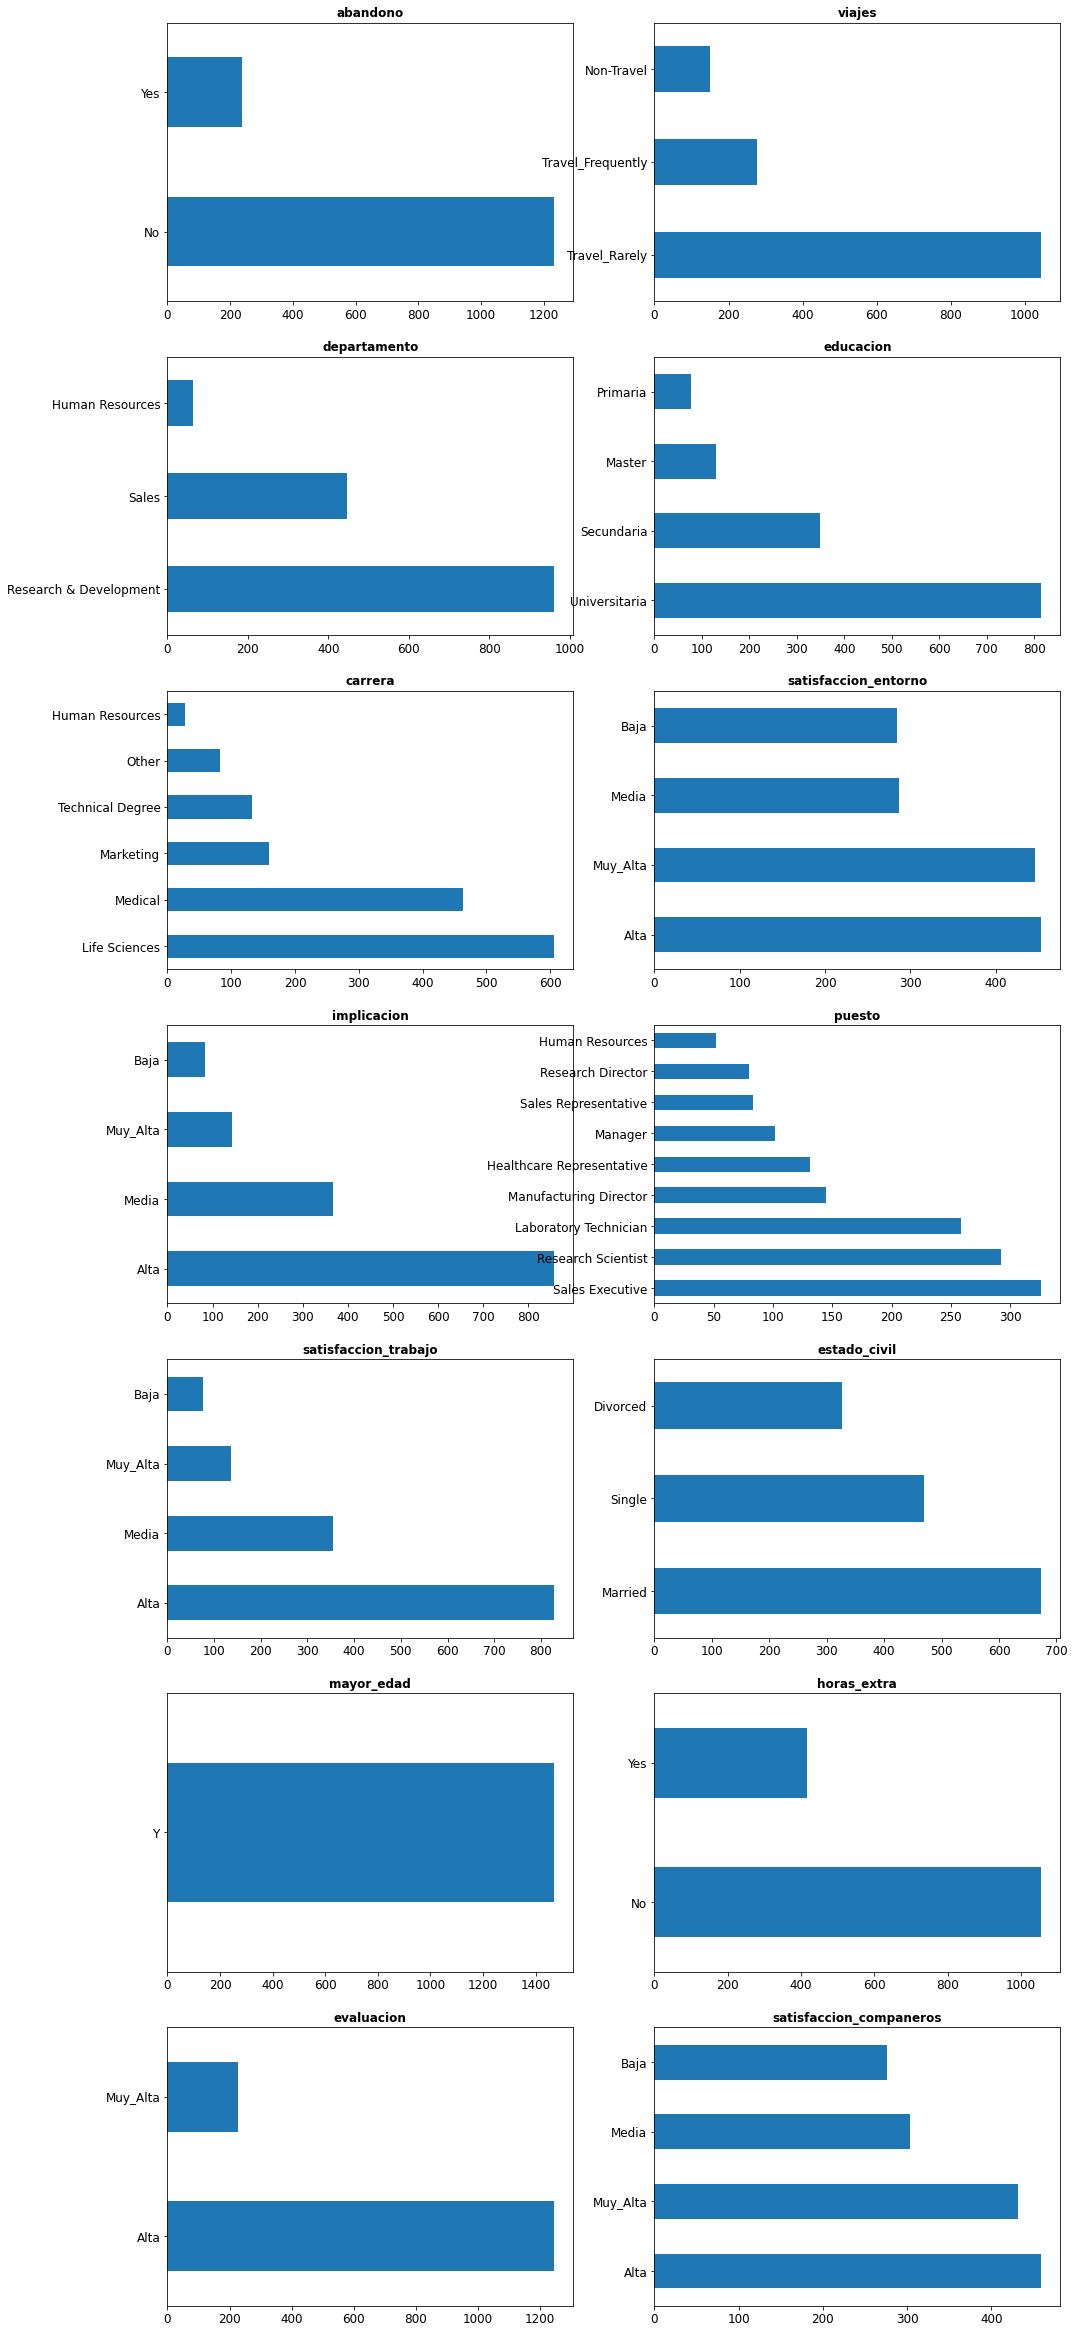

In [ ]:
graficos_eda_categoricos(df.select_dtypes('O'))

Viendo los gráficos puedo ver la calidad de los datos de trabajo:

* mayor_edad solo tiene un valor --> eliminarla (todos los empleados son mayores de edad)

* Sobre las imputaciones pendientes de variables categóricas:
  * educacion: imputar por 'Universitaria' (más del 55% de los empleados tienen estudios universitarios)

  * satisfaccion_trabajo: imputar por 'Alta' (más del 55% de los empleados cuenta con una alta satisfacción respecto a su trabajo)

  * implicacion: imputar por 'Alta' (más del 60% de los empleados tienen una implicación alta)

In [ ]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

#### EDA VARIABLES NUMÉRICAS

In [ ]:
def estadisticos_cont(num):
    #Calculo describe
    estadisticos = num.describe().T
    #Añado la mediana
    estadisticos['median'] = num.median()
    #Reordeno para que la mediana esté al lado de la media por practicidad
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(estadisticos)

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusiones:

* Empleados solo tiene un valor --> Eliminarla
* Sexo tiene 4 valores --> Eliminarla
* Horas quincena solo tiene un valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como luego la voy a eliminar ya no hay que imputar nada



Como la media de la variable "edad" es parecida a la mediana esto podría indicar que esta variable siga una distribucion normal. Además se ve por los percentiles que el 50% de los empleados tienen entre 30 y 43 años.
Por curiosidad quiero ver si esta variable cumple o no con esta distribución.

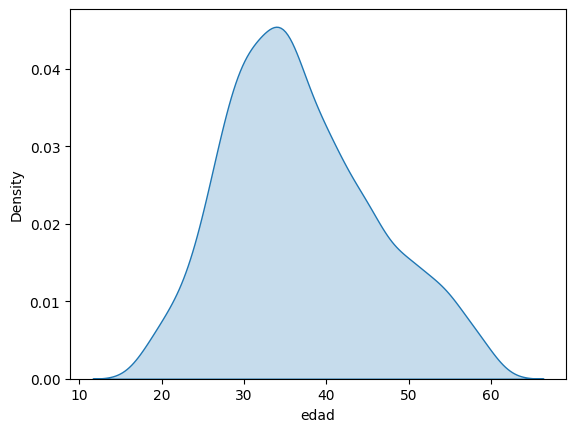

In [ ]:
import seaborn as sns

# Gráfico de densidad utilizando Seaborn
sns.kdeplot(df['edad'], fill=True)
plt.show()

In [ ]:
import seaborn as sns

from scipy.stats import shapiro, kstest

# Prueba de normalidad de Shapiro-Wilk
stat, p_valor = shapiro(df['edad'])
print("Prueba de Shapiro-Wilk:")
print("Estadístico:", stat)
print("P-valor:", p_valor)

# Prueba de Kolmogorov-Smirnov
stat, p_valor = kstest(df['edad'], 'norm')
print("\nPrueba de Kolmogorov-Smirnov:")
print("Estadístico:", stat)
print("P-valor:", p_valor)


Prueba de Shapiro-Wilk:
Estadístico: 0.9774477481842041
P-valor: 2.0344830149992416e-14

Prueba de Kolmogorov-Smirnov:
Estadístico: 1.0
P-valor: 0.0


Dado que el valor p obtenido en SW es 2.0344830149992416e-14 es mucho menor que el nivel de significancia típico de 0.05, puedo rechazar la hipótesis nula. Es decir, hay evidencia significativa para concluir que los datos no provienen de una distribución normal.

El valor p obtenido en KS es 0.0, lo que indica que es extremadamente improbable que el estadístico de prueba sea tan grande como el observado si los datos provienen de una distribución normal. Esto sugiere que hay evidencia significativa para rechazar la hipótesis nula y concluir que los datos no siguen una distribución normal.

*Siguiendo con el análisis...*

In [ ]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


### GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cual es la tasa de abandono?

In [ ]:
df.abandono.value_counts(normalize = True) * 100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

Gracias a conocer este dato se pueden tomar medidas y saber si la empresa se encuentra en el rango promedio del mercado para el rubro al que se dedique o si realmente tiene una migración de talento que va a costar en todo aspecto reponer.

---
<br/><br/>

### ¿Hay un perfil tipo de empleado que deja la empresa?

Análisis de penetración: tengo una variable a estudiar (variable target, que es la fuga de empleados) y cruzo dicha variable con el resto que pienso que pueden aportar algo respecto de un perfil.


In [ ]:
# Transformar abandono a numérica
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

En el siguiente código se puede observar como se segmenta por eduación (en porcentaje por cantidad de empleados) y se grafica en base a la media de abandono. Se ve como la media de los empleados con estudios primarios tienen un abandono del 33% aproximadamente, el cual se va reduciendo a medida que el nivel de estudios es superior llegando a master donde la media de abandono es menor al 10%.
A mayor educación, menor probabilidad de abandono de la empresa.

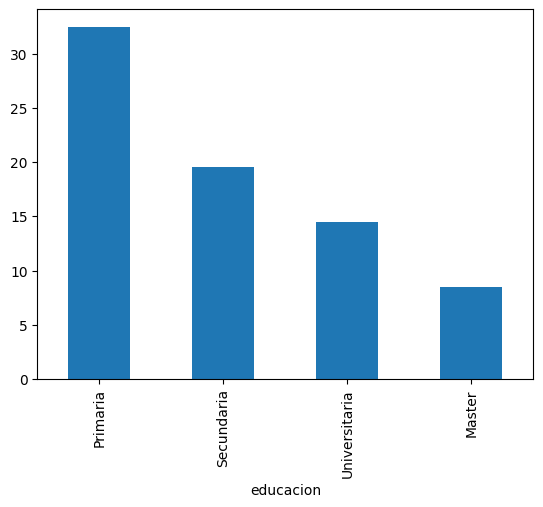

In [ ]:
# Análisis por educación
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

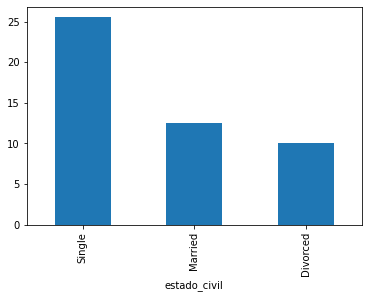

In [ ]:
# Análisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

En cuanto al estado civil, se observa como la tasa media de abandono de la empresa es de aproximadamente el doble en los solteros que en los casados.

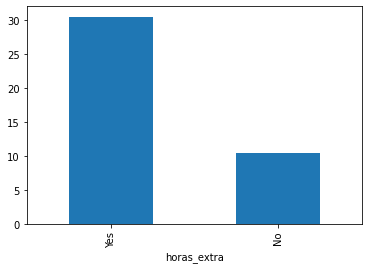

In [ ]:
# Análisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

Para los empleados que realizan horas extras es aún mayor la relación que en la variable anterior, pues una media del 30% dejan la empresa contra una del 10% de los que no hacen horas extras.

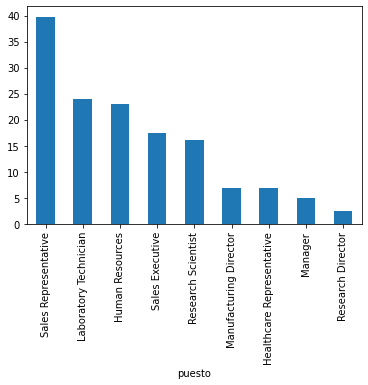

In [ ]:
# Análisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

En el caso de la varible "puesto" se destaca a los representantes de ventas con un 40%. Puede haber varios motivos, pero por ejemplo, en este caso, pueden dejar el puesto porque la competencia les ofrezca mayores comisiones en sus ventas, a diferencia de otros puestos que no tienen esa clase de incentivos.

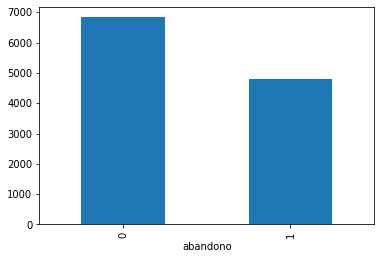

In [ ]:
# Análisis de abandono según remuneración
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

**Conclusiones**:

El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Trabaja en ventas
* Bajo salario
* Alta carga de horas extras

---
<br/><br/>

### ¿Cual es el impacto económico de este problema?

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [ ]:
# Creo una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


Se busca el costo anual de reponer a cada empleado según la información obtenida en el estudio "Cost of Turnover" antes mencionado. Por eso segmento a los empleados por las escalas salariales mencionadas y multiplico por el factor correspondiente.
De esta forma, creo una estimación de cuanto costaría reponer a cada empleado segmentando en base a su salario y perfil aplicando los costes hallados por el estudio.

In [ ]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]

#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


Por ejemplo, según lo observado en la tabla, el costo del empleado 1 que abandonó la empresá costó 14670 usd.

---
<br/><br/>

### ¿Cúanto le ha costado este problema a la empresa en el último año?

In [ ]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

---
<br/><br/>

### ¿Cuanto le cuesta a la empresa que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [ ]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

---
<br/><br/>

### ¿Cuanto dinero podría ahorrar la empresa fidelizando mejor a sus empleados?

In [ ]:
print(f"Reducir un 10% la fuga de empleados ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


---
<br/><br/>

### Y se pueden seguir trazando estrategias asociadas a los insights de abandono:

Ya se vio que los representantes de ventas son el puesto que más se van. Entonces, ¿tendría sentido hacer un plan específico para ellos? ¿Cuál sería el coste ahorrado si se disminuye la fuga un 30%?

Primero voy a calcular el % de representantes de ventas que se han ido el año pasado

In [ ]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado
# se han ido el 39.76%

0.39759036144578314

Ahora estimo cuántos se irán este año

In [ ]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [ ]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


Este dato también es muy interesante porque permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya sé que se pueden gastar hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada

## MODELO DE MACHINE LEARNING

In [ ]:
df_ml = df.copy()
# Separo las variables entre la variable a predecir y las predictoras.
# Además de separar entre los datos de test y entrenamiento, este cuenta de usar algoritmos como árboles de decisión y ajustarlo a nuestro modelo.

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

Para utilizar la librería scikit-learn todas las variables tienen que estar en formato numérico y no puede haber nulos.
Luego, en otro orden de importancia puedo escalar las variables. Por ejemplo, para la variable edad que está entre 18 y 60 años, no es lo mismo que la variable ingresos que estará entre 100 mil y 300 mil. Otra forma es normalizaar las variables para que sigan una distribución normal.

#### Transformar todas las variables categóricas a númericas

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# El método OneHotEncoder lo que hace es de cada variable categórica y generar 0 y 1 de cada variable.
# Por ejemplo, si tengo una variable con tres valores (azul, verde y amarillo), transforma esa variable en tres variables distintas de tal manera que
#si un registro tenía en la variable original el valor verde, en las nuevas variables va a tener 0 en la nueva variable azul, un 0 en la
#amarillo y un 1 en la verde.

# Categóricas
cat = df_ml.select_dtypes('O')

# Instancio
ohe = OneHotEncoder(sparse_output = False)

# Entreno
ohe.fit(cat)

# Aplico
cat_ohe = ohe.transform(cat)

# Pongo los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [ ]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Dataframe final

Selecciono las variables numéricas para poder juntarlas a las cat_hoe

In [ ]:
num = df.select_dtypes('number').reset_index(drop = True)

Las junto todas en el dataframe final

In [ ]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml
# con esta funcion junto el fichero de las variables categóricas con el de las numéricas

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


### DISEÑO DE LA MODELIZACIÓN

#### Separación predictoras y target

In [ ]:
x = df_ml.drop(columns='abandono') # conjunto de variables predictoras
y = df_ml['abandono'] # esta es la variable target/a precedir

#### Separación train y test

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

# 4 objetos, dos variables del conjunto de entrenamiento: train_x (predictora) train_y (target) y lo mismo para el conjunto de test

### ENTRENAMIENTO DEL MODELO SOBRE TRAIN

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar
ac = DecisionTreeClassifier(max_depth=4) # le pido 4 niveles

# Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

In [ ]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1] # sólo le pido los que se fueron, por eso el 1
pred[:20]

array([0.11952191, 0.        , 0.11952191, 0.04201681, 0.04201681,
       0.03421053, 0.03421053, 0.04201681, 0.04201681, 0.71428571,
       0.03421053, 0.08163265, 0.11952191, 0.11952191, 0.04201681,
       0.63888889, 0.11952191, 0.63888889, 0.11952191, 0.11952191])

Ahora queda contrastar con los datos reales que tengo de los empleados para que compare por ejemplo lo básico de si el empleado se ha ido o no de la empresa.

In [ ]:
# Evaluación
from sklearn.metrics import roc_auc_score
# esta métrica nos va a devolver un número que nos indica que, si este está por debajo de 0.7 no es muy bueno. Si está entre 0.7 y 0.8,
#el modelo es bueno y práctico y si es mayor a 0.8 y 1 quiere decir que es muy bueno.

roc_auc_score(test_y,pred)

0.6682851550737728

Si se obtiene que el modelo no es bueno, hay que volver atrás e intentar trabajar sobre el propio modelo o bien intentar darle datos que no se le hayan proporcionado antes.

Las curvas **ROC (Receiver Operating Characteristic)** son una herramienta comúnmente utilizada en el análisis de diagnósticos y en la evaluación de modelos de clasificación en aprendizaje automático. Son gráficos que representan la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para diferentes umbrales de clasificación.

*Tasa de verdaderos positivos (TPR)*: También conocida como sensibilidad o recall, mide la proporción de instancias positivas que se clasifican correctamente como positivas. Se calcula como TP / (TP + FN), donde TP son los verdaderos positivos y FN son los falsos negativos.

*Tasa de falsos positivos (FPR)*: Mide la proporción de instancias negativas que se clasifican incorrectamente como positivas. Se calcula como FP / (FP + TN), donde FP son los falsos positivos y TN son los verdaderos negativos.

Una curva ROC representa estas dos tasas para diferentes umbrales de clasificación. Un modelo de clasificación que es completamente aleatorio tendría una curva ROC que sigue la diagonal (línea punteada) desde el punto (0,0) hasta el punto (1,1). Un modelo perfecto tendría una curva ROC que sube verticalmente desde (0,0) hasta (0,1) y luego horizontalmente hasta (1,1).

La interpretación de una curva ROC se realiza mediante el cálculo del área bajo la curva (AUC).
El AUC proporciona una medida de la capacidad de discriminación del modelo, donde un AUC de 1 indica un modelo perfecto y un AUC de 0.5 indica un modelo que es esencialmente aleatorio. Cuanto mayor sea el AUC, mejor será el rendimiento del modelo en la clasificación binaria.

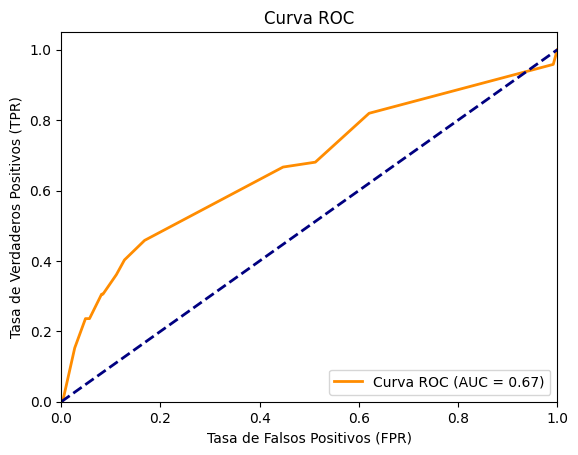

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcula la tasa de verdaderos positivos (TPR), la tasa de falsos positivos (FPR) y los umbrales de clasificación
fpr, tpr, thresholds = roc_curve(test_y, pred)

# Calculo el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### INTERPRETACIÓN

#### Diagrama del árbol

Utilizo este algoritmo pues es uno de los que tiene mayor capacidad de explicabilidad (sin tener que hacer nada)

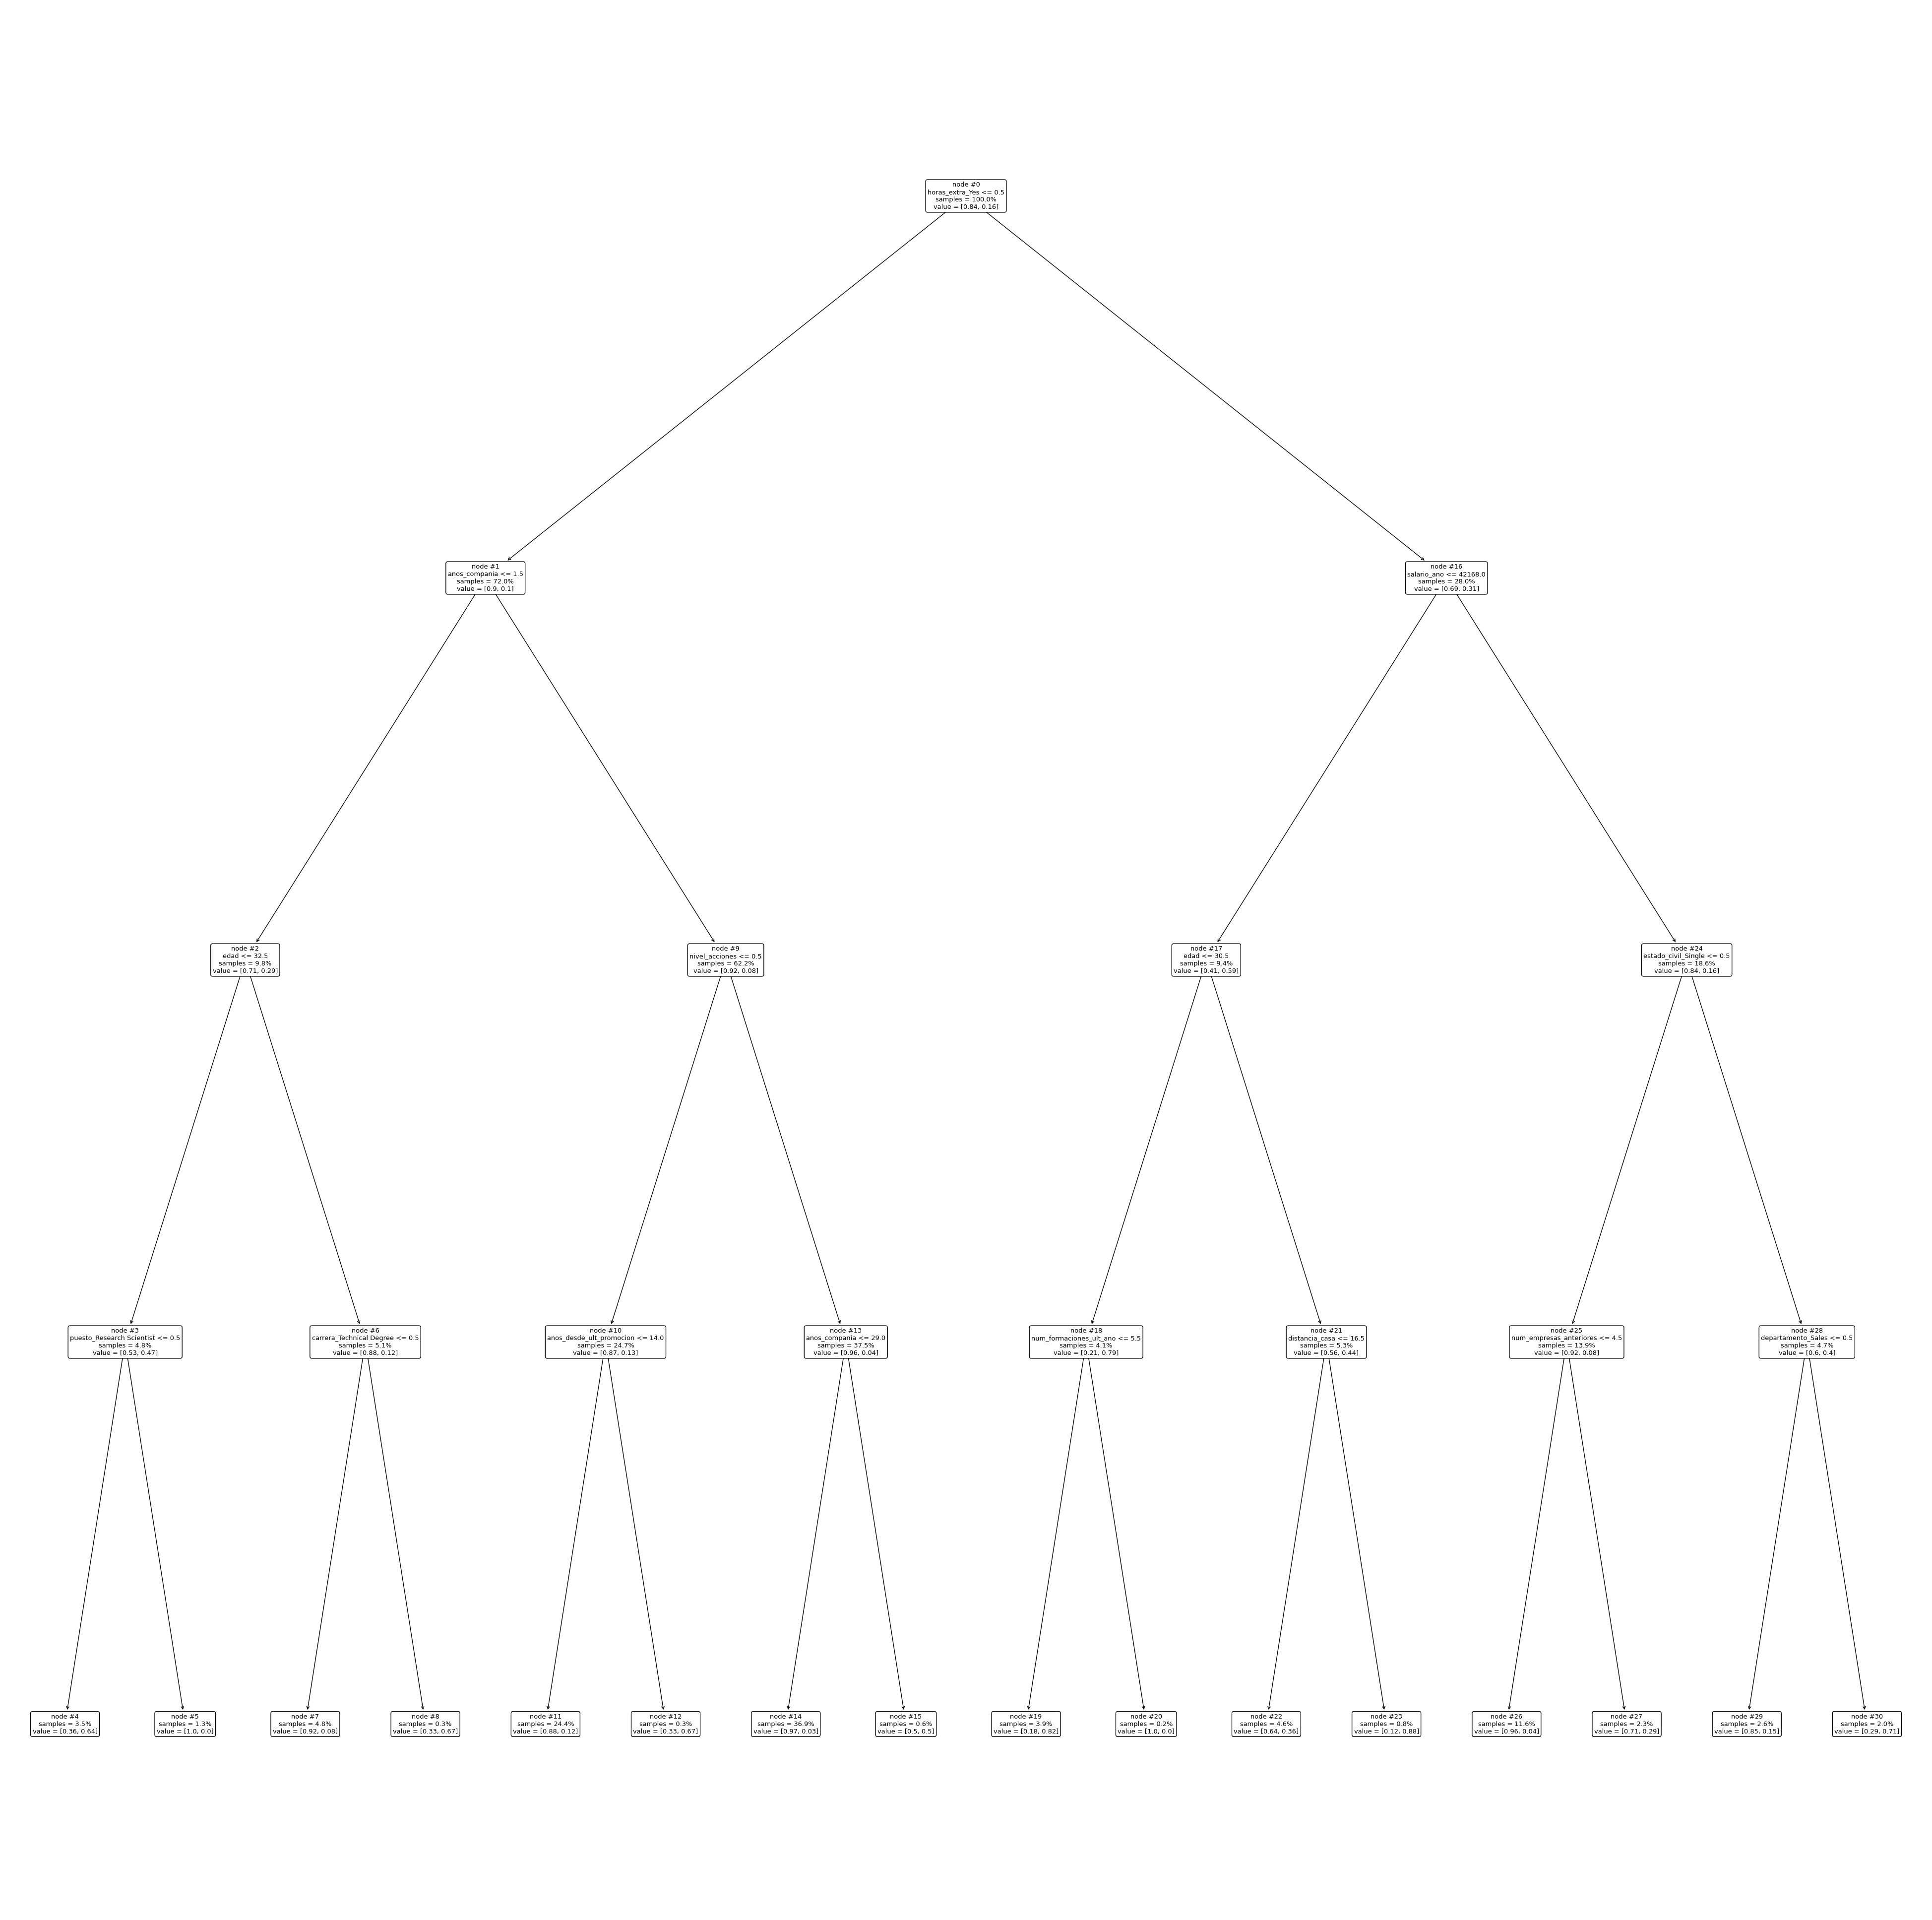

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

El conjunto de validación como era el 30%, muestra 441 empleados de los 1470 totales en el primer nivel. Se ve que en este tengo la penetración inicial de la target, o sea, los empleados que han abandonado la empresa, el cual da como en análisis anteriores un 16% lo que es bueno porque quiere decir que este conjunto de test *es representativo del total*.

Ahí mismo identifica la variable y el punto de corte que mejor es capaz de romper ese 16%, que es la variable horas_extra cuando sean menor o igual a 0.5. Cuando un empleado cumpla esa condición se irá por el lado de la izquierda. Caso contrario, es decir, que no se cumpla, va por la rama derecha. Como se trabajó con las variables categóricas sabemos que como es menor o igual a 0.5 significa que NO hace horas extras. Los que no cumplen la condición, es que SI hacen horas extras entonces van por la parte de la derecha.
Bajando en el árbol vemos como en la parte izquierda (NO hacen horas extras) la penetracion del abandono es del 11% del 16% que abandona y a la derecha los que hacen horas extras tenemos el perfil que más probabilidad tiene de abandonar con un 31%. Esta parte nos dice que el 28% de los empleados hacen horas extras y que el 31% de ese 28% se han ido. En este caso la variable que mejor explica es el impacto_abandono siendo menor o igual a 8853 aprox. Si se cumple ese criterio irá por la izquierda. Cumplir esto significa pasar a tener un 53% de probabilidades de irte. Vemos que las mayores posibilidades de irse las tienen los empleados que hacen horas extras y que tienen un impacto de abandono como el mencionado.
Así se sigue analizando y veo que tenemos como corte la variable del nivel accionario en un 53%. Si vamos por izq quiere decir que el empleado NO tiene acciones, por derecha que SI. Entonces pasamos de un 53% de probabilidad de irse a un 39% (por la derecha) porque sí tienen acciones, lo cual tiene sentido. En caso contrario esta probabilidad aumenta hasta un 69%.
En lo siguiente tengo la variable de la distancia a la casa la cual dice que si es menor o igual a 6.5 km se llega a una probabilidad de que el empleado abandone la empresa del 94% (por la derecha significa que su casa queda a más de esa distancia).

El perfil obtenido en el análisis es que haga horas extras, que el impacto de abandono sea menor o igual a 8853$, que no tenga acciones y que la distancia a la casa sea mayor a 6.5 km. Dicho perfil cuenta con una probabilidad de abandono del 94%.

Sería interesante analizar las otras opciones finales con posibilidad alta de abandono.

#### Importancia de las variables

Encuentro y grafico la importancia de las variables y obtengo que 13 son las más importantes, luego las demas tienen una probabilidad casi cero. Podría a su vez dividirlas en varios grupos puesto que las primeras destacan más que las otras.

Las más importantes son el salario, que hagan horas extras, los años en la empresa y la edad. Esto permite tomar acciones diciendo que estas son las primordiales.

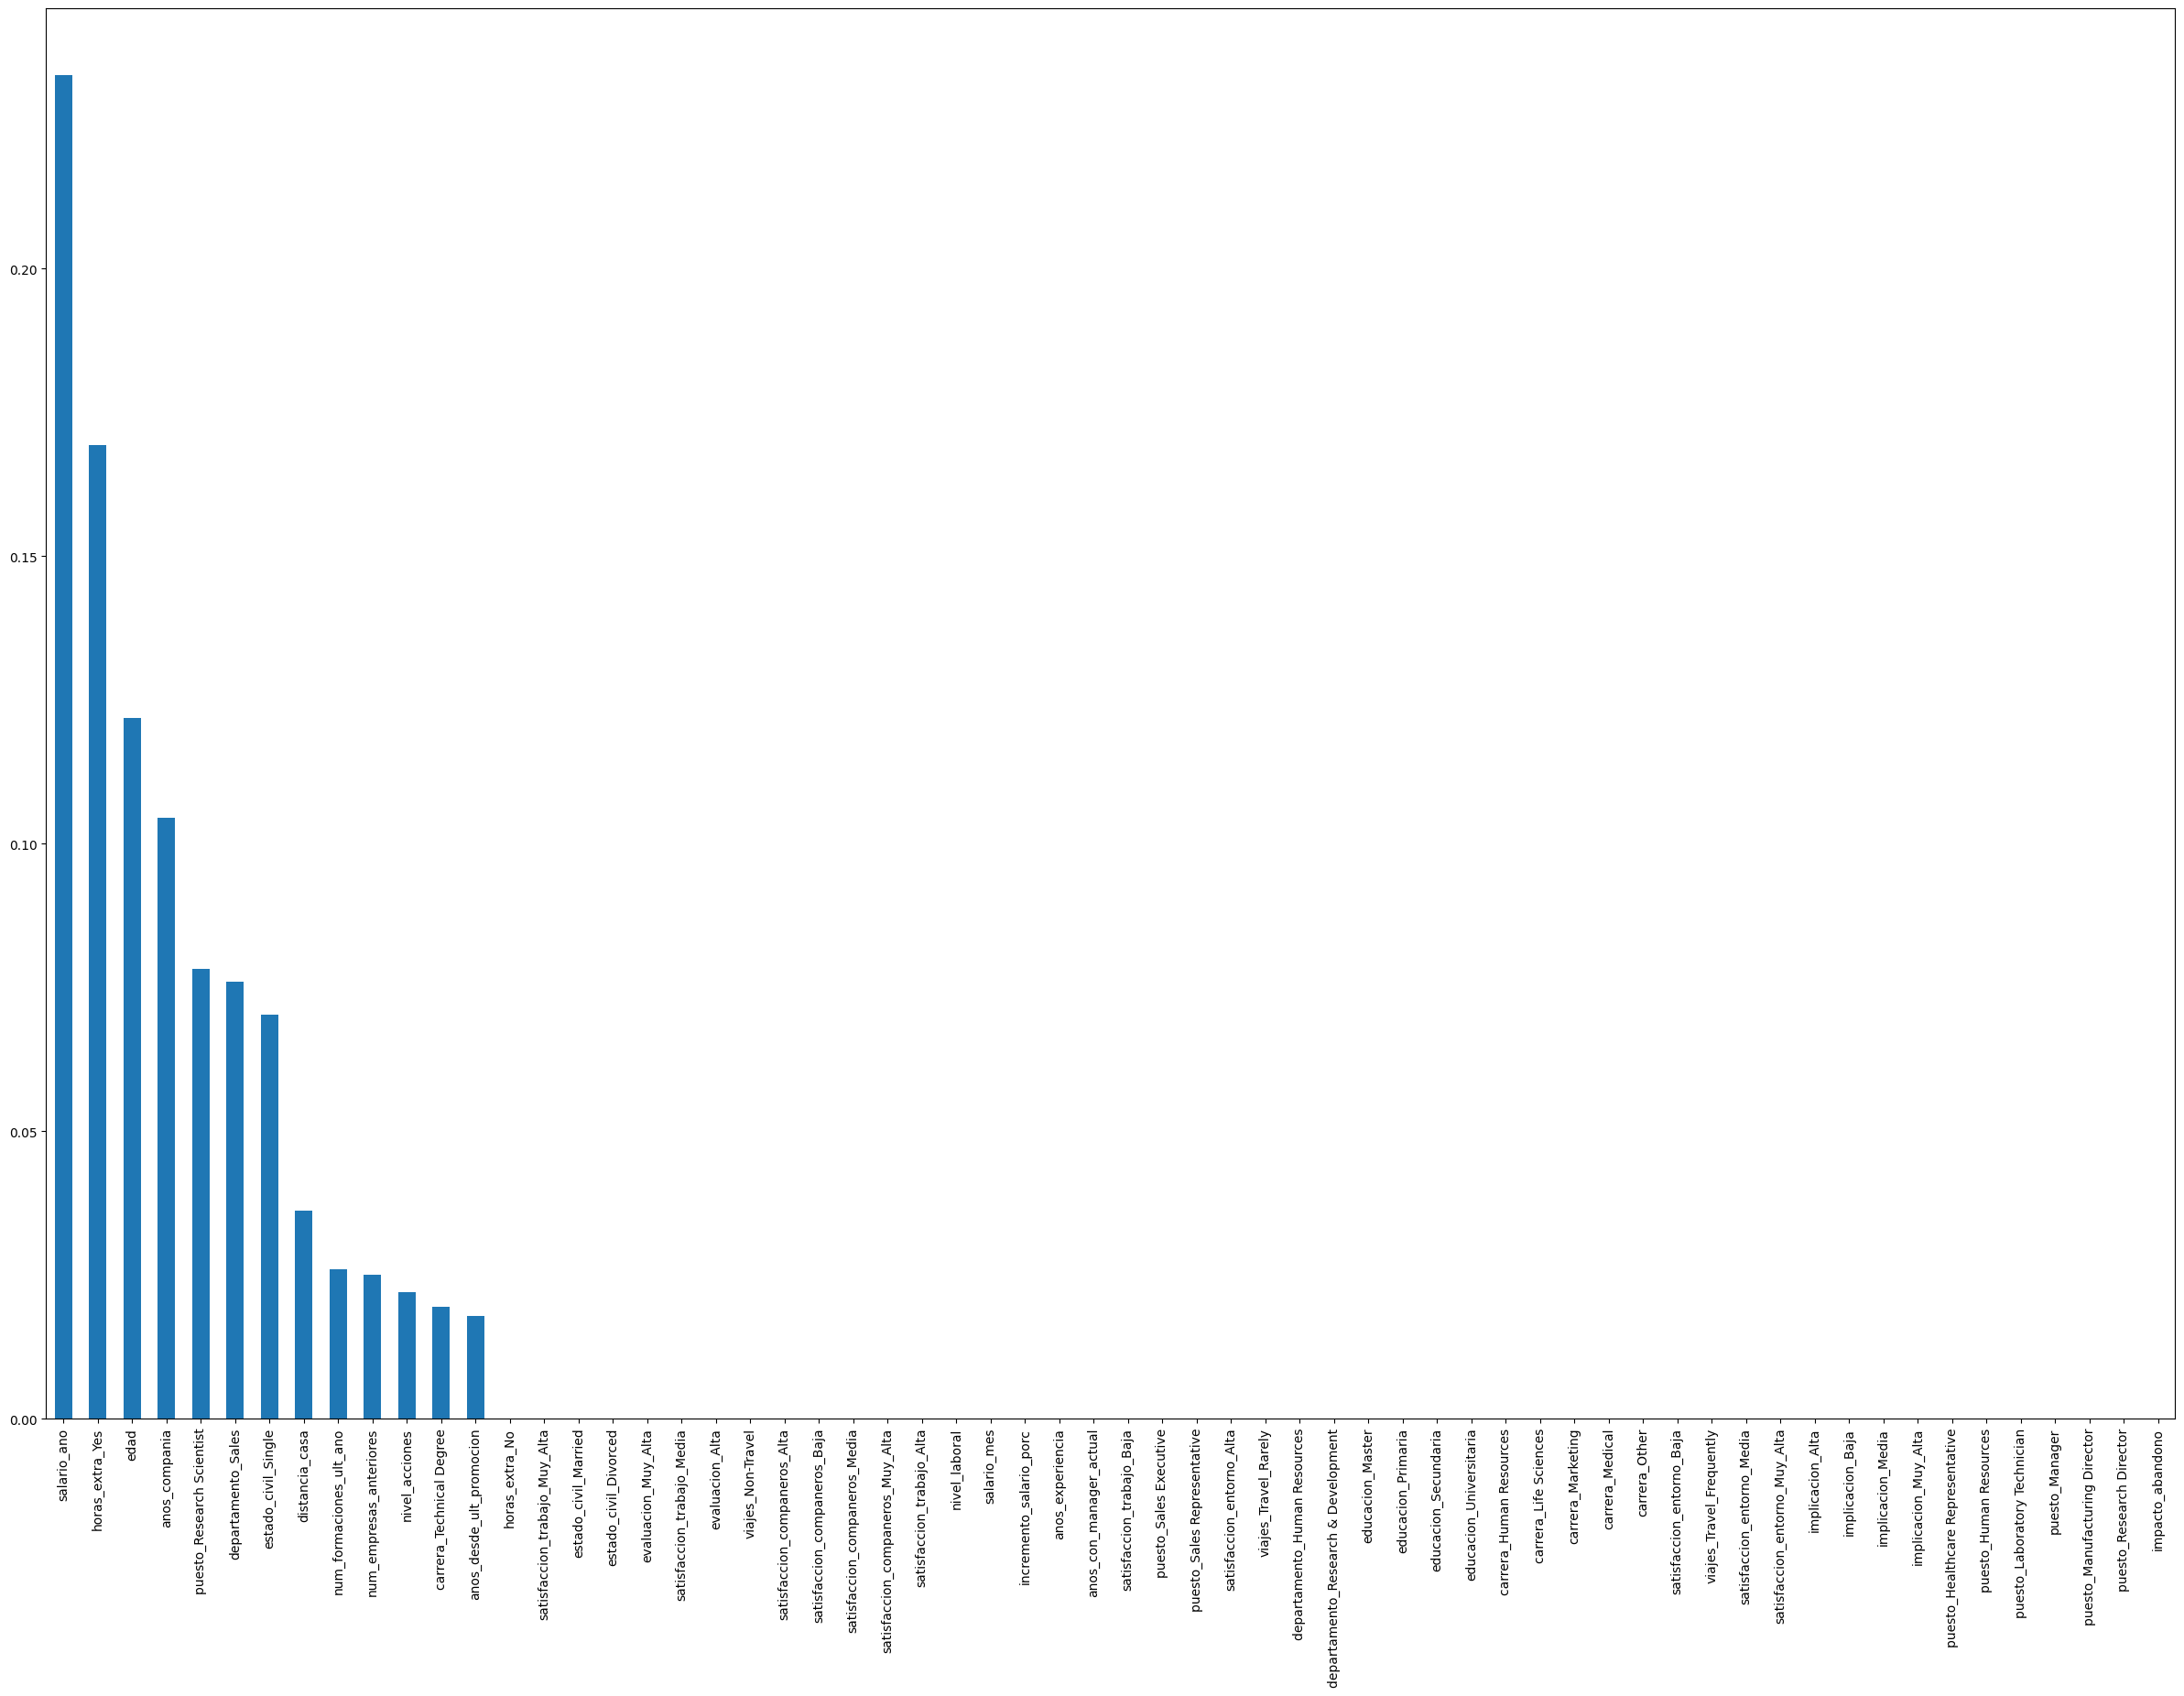

In [ ]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

### EXPLOTACIÓN

Incoporación del scoring al dataframe principal

In [ ]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
df
# Agrego una nueva variable al dataset original y la lleno con la predicción una vez que elimino la columna de abandono

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.714286
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.034211
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.361702
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.361702
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.034211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.034211
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.034211
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.042017


Ejemplo de los 10 empleados con mayor probabilidad de dejar la empresa

In [ ]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]
# ordena los primeros 10 valores según la nueva variable en orden descendente

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
881,35,1,Travel_Frequently,Research & Development,25,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Baja,1,10,3,10,7,8,24264,3906.504,0.875
1767,43,1,Travel_Frequently,Research & Development,17,Universitaria,Technical Degree,Alta,Media,1,...,Muy_Alta,1,6,4,1,0,0,29244,4708.284,0.875
281,40,0,Travel_Rarely,Research & Development,19,Universitaria,Medical,Alta,Alta,2,...,Alta,1,15,2,7,3,7,32892,6479.724,0.875
911,32,1,Travel_Rarely,Research & Development,25,Universitaria,Life Sciences,Baja,Alta,1,...,Alta,0,1,2,1,0,1,33540,6607.380,0.875
248,41,1,Travel_Rarely,Sales,20,Universitaria,Marketing,Media,Alta,1,...,Muy_Alta,0,4,5,4,0,2,37680,7422.960,0.875
1108,33,1,Travel_Rarely,Research & Development,25,Secundaria,Medical,Baja,Media,1,...,Media,0,5,0,2,2,2,27756,4468.716,0.875
392,44,1,Travel_Frequently,Research & Development,24,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Muy_Alta,1,19,0,1,0,0,37932,7472.604,0.875
752,42,1,Travel_Frequently,Research & Development,19,Universitaria,Medical,Alta,Muy_Alta,1,...,Muy_Alta,0,7,2,2,2,2,33108,6522.276,0.875
716,50,0,Travel_Rarely,Research & Development,28,Master,Medical,Muy_Alta,Muy_Alta,1,...,Alta,3,20,3,20,3,8,38652,7614.444,0.875


Ejemplo: riesgo de dejar la empresa por puesto de trabajo

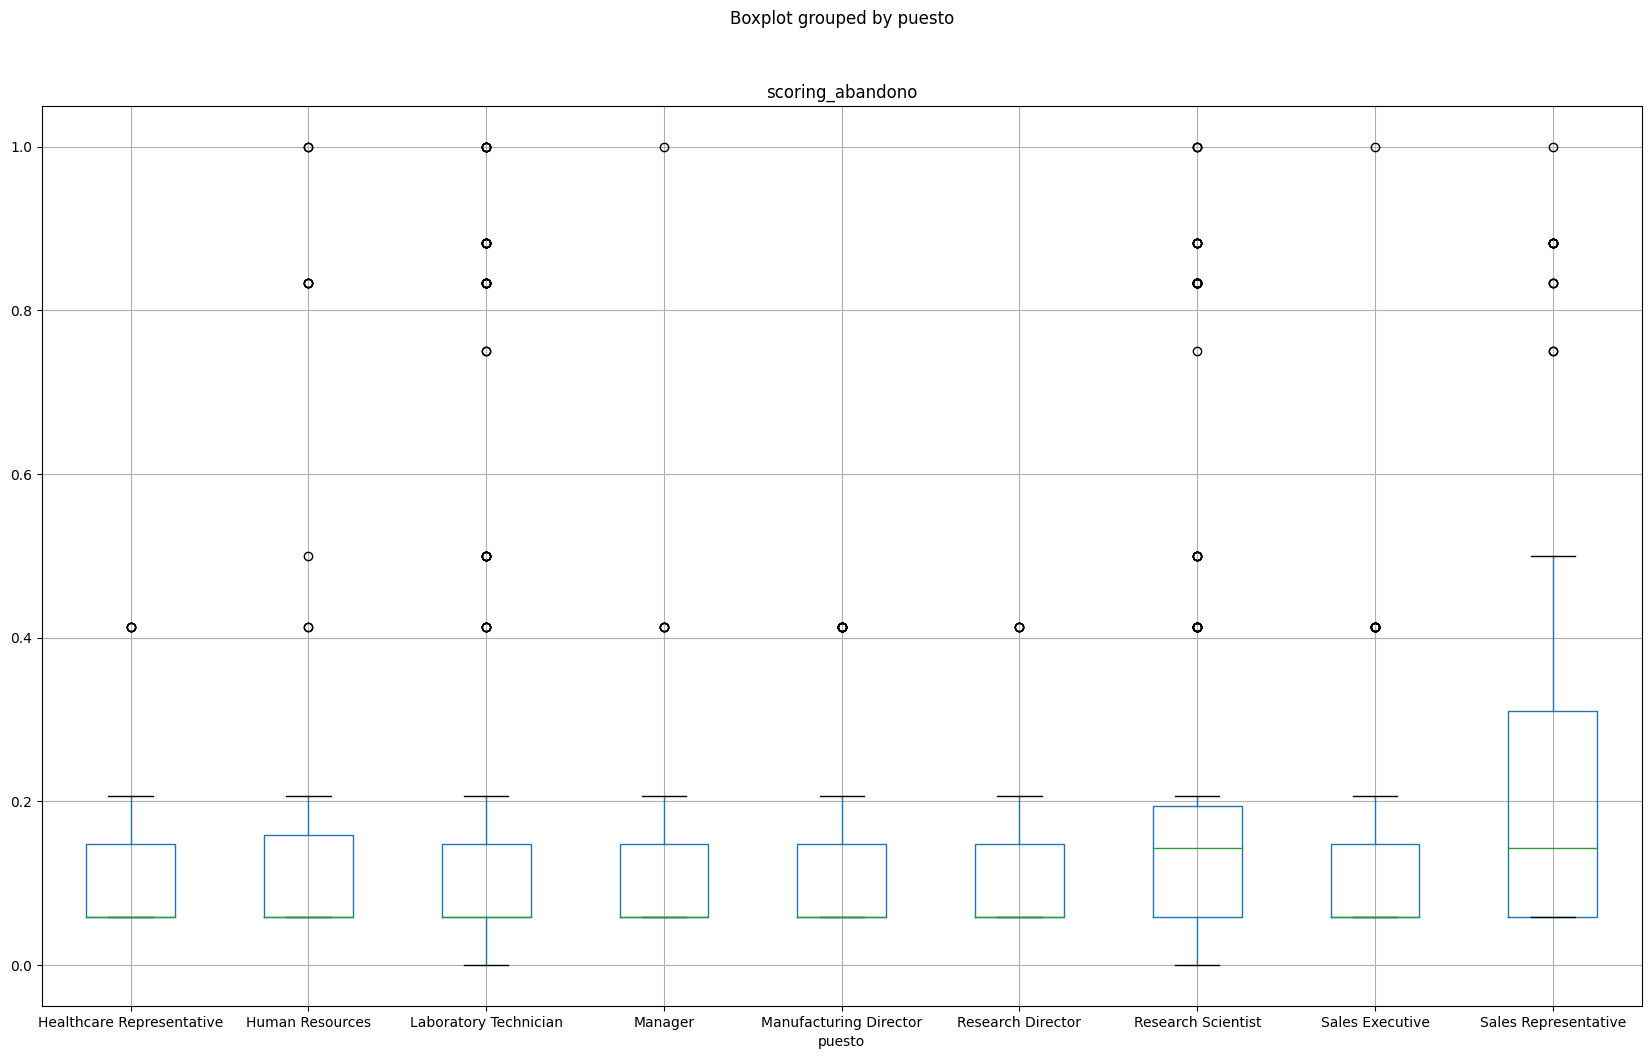

In [ ]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

# además de la nueva variable, con este boxplot puedo dividir por puesto. También podría dividir por manager que tiene cada empleado, a ver qué tan bien gestionan
# su grupo y cuan bien los motivan a seguir creciendo en la empresa
# Se puede dividir por cualquier otra variable y va a dar la mediana y el percentil 25 y el 75.

### GUARDAR EL RESULTADO

In [ ]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.413043
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.059022
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.833333
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.147727
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.059022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.059022
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.059022
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.147727


In [ ]:
from google.colab import files

df.to_excel('abandono_con_scoring.xlsx')
files.download('abandono_con_scoring.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>